# CITE-seq analysis

In [1]:
library(dplyr)
library(magrittr)
library(purrr)

library(ggplot2)
library(patchwork)
theme_set(theme_bw(base_size=12) + theme(panel.grid=element_blank(), 
                             panel.border=element_blank(), 
                             axis.title=element_blank(), 
                             axis.text=element_blank(), 
                             axis.line = element_line(arrow=arrow(length=unit(2, "mm"))),
                             strip.text = element_text(size=12),
                             strip.background=element_blank()))

library(Matrix)

library(SingleCellExperiment)
library(scran)
library(scater)

library(scutility)
library(multisce)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘purrr’


The following object is masked from ‘package:magrittr’:

    set_names


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVar

In [6]:
sce <- multisce_load(path=here::here("data", "multisce", "SS17_blood"), main_name="RNA", reduceddim_include="umap", altexp_include=c("VI_ADT", "TF"), metadata_include="colors")

Loading RNA from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/sce/RNA.rds

Loading coldata from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/coldata.rds

Loading colors from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/metadata/colors.rds

Loading VI_ADT from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/sce/VI_ADT.rds

Loading TF from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/sce/TF.rds

Loading umap from /home/tbb/git/CTCL_SE_drug_resistance/data/multisce/SS17_blood/reducedDim/umap.rds



In [7]:
group_to_short <- c("PBS_DMSO"="Veh",
                    "PBS_Romidepsin"="Ro",
                    "SE_DMSO"="SE",
                    "SE_Romidepsin"="SE+Ro")

sce$group_short <- group_to_short[as.character(sce$group)]

metadata(sce)$colors[["group_short"]] <- c("Veh"="grey", "Ro"="#009900", "SE"="#CC0000", "SE+Ro"="orange")

In [5]:
plots <- list()

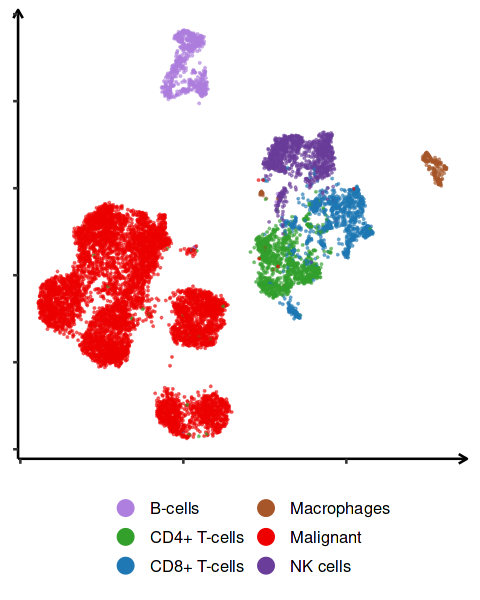

In [7]:
plots$cell_type <- scutility::plot_dimred(sce, dimred="umap", rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, shuffle=TRUE, 
                           scale_color=scale_color_manual(values=metadata(sce)$colors[["cell_type"]] %>% .[names(.) %in% unique(sce$cell_type)]), 
                           colour_by="cell_type") + 
                       guides(color=guide_legend(ncol=2, override.aes=list(alpha=1, size=4))) + 
                       theme(legend.position="bottom", aspect.ratio=1, legend.title=element_blank()) 

options(repr.plot.width=4, repr.plot.height=5)
plots$cell_type

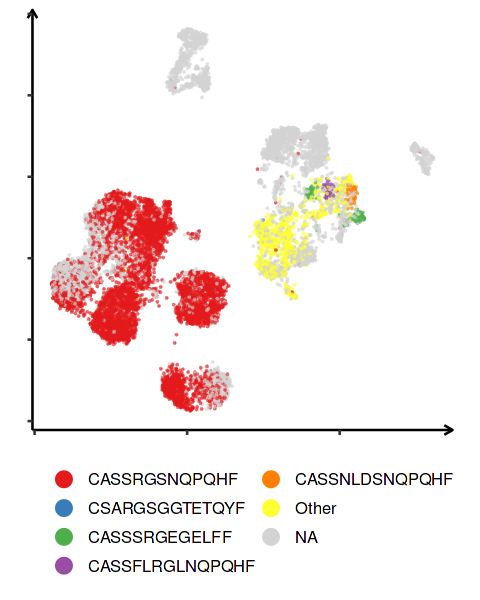

In [8]:
plots$TCR <- scutility::plot_dimred(sce, dimred="umap", rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, shuffle=TRUE, 
                           #scale_color=scale_color_manual(values=metadata(sce)$colors[["cell_type"]]), 
                           colour_by="TRB_top5") + 
                       guides(color=guide_legend(ncol=2, override.aes=list(alpha=1, size=4))) + 
                       theme(legend.position="bottom", aspect.ratio=1, legend.title=element_blank()) 

options(repr.plot.width=4, repr.plot.height=5)
plots$TCR

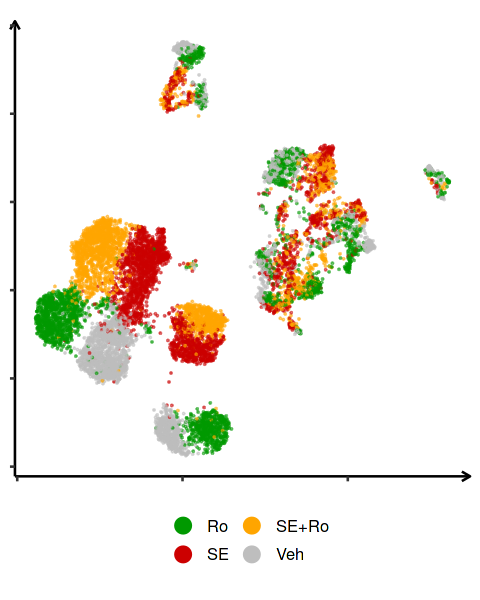

In [9]:
plots$group <- scutility::plot_dimred(sce, dimred="umap",rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, shuffle=TRUE, 
                           scale_color=scale_color_manual(values=metadata(sce)$colors[["group_short"]]), 
                           colour_by="group_short") + 
                       guides(color=guide_legend(ncol=2, override.aes=list(alpha=1, size=4))) + 
                       theme(legend.position="bottom", aspect.ratio=1, legend.title=element_blank()) 

options(repr.plot.width=4, repr.plot.height=5)
plots$group

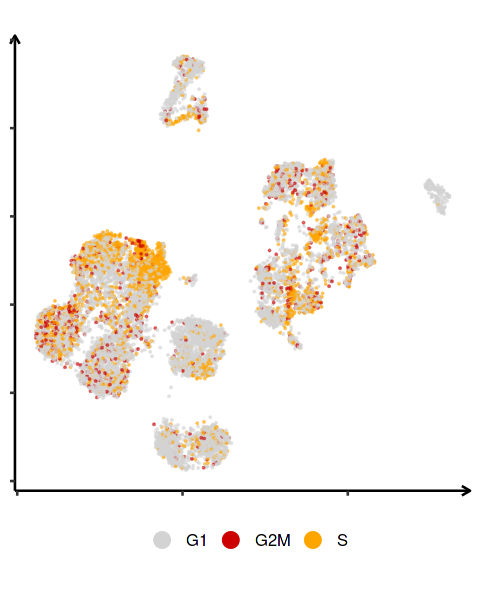

In [10]:
plots_cc <- scutility::plot_dimred(sce, dimred="umap",rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, shuffle=TRUE, 
                           #scale_color=scale_color_manual(values=metadata(sce)$colors[["cell_type"]]), 
                           colour_by="cc_phase") + 
                       guides(color=guide_legend(ncol=3, override.aes=list(alpha=1, size=4))) + 
                       theme(legend.position="bottom", aspect.ratio=1, legend.title=element_blank()) 

options(repr.plot.width=4, repr.plot.height=5)
plots_cc

### Cell type and activation markers

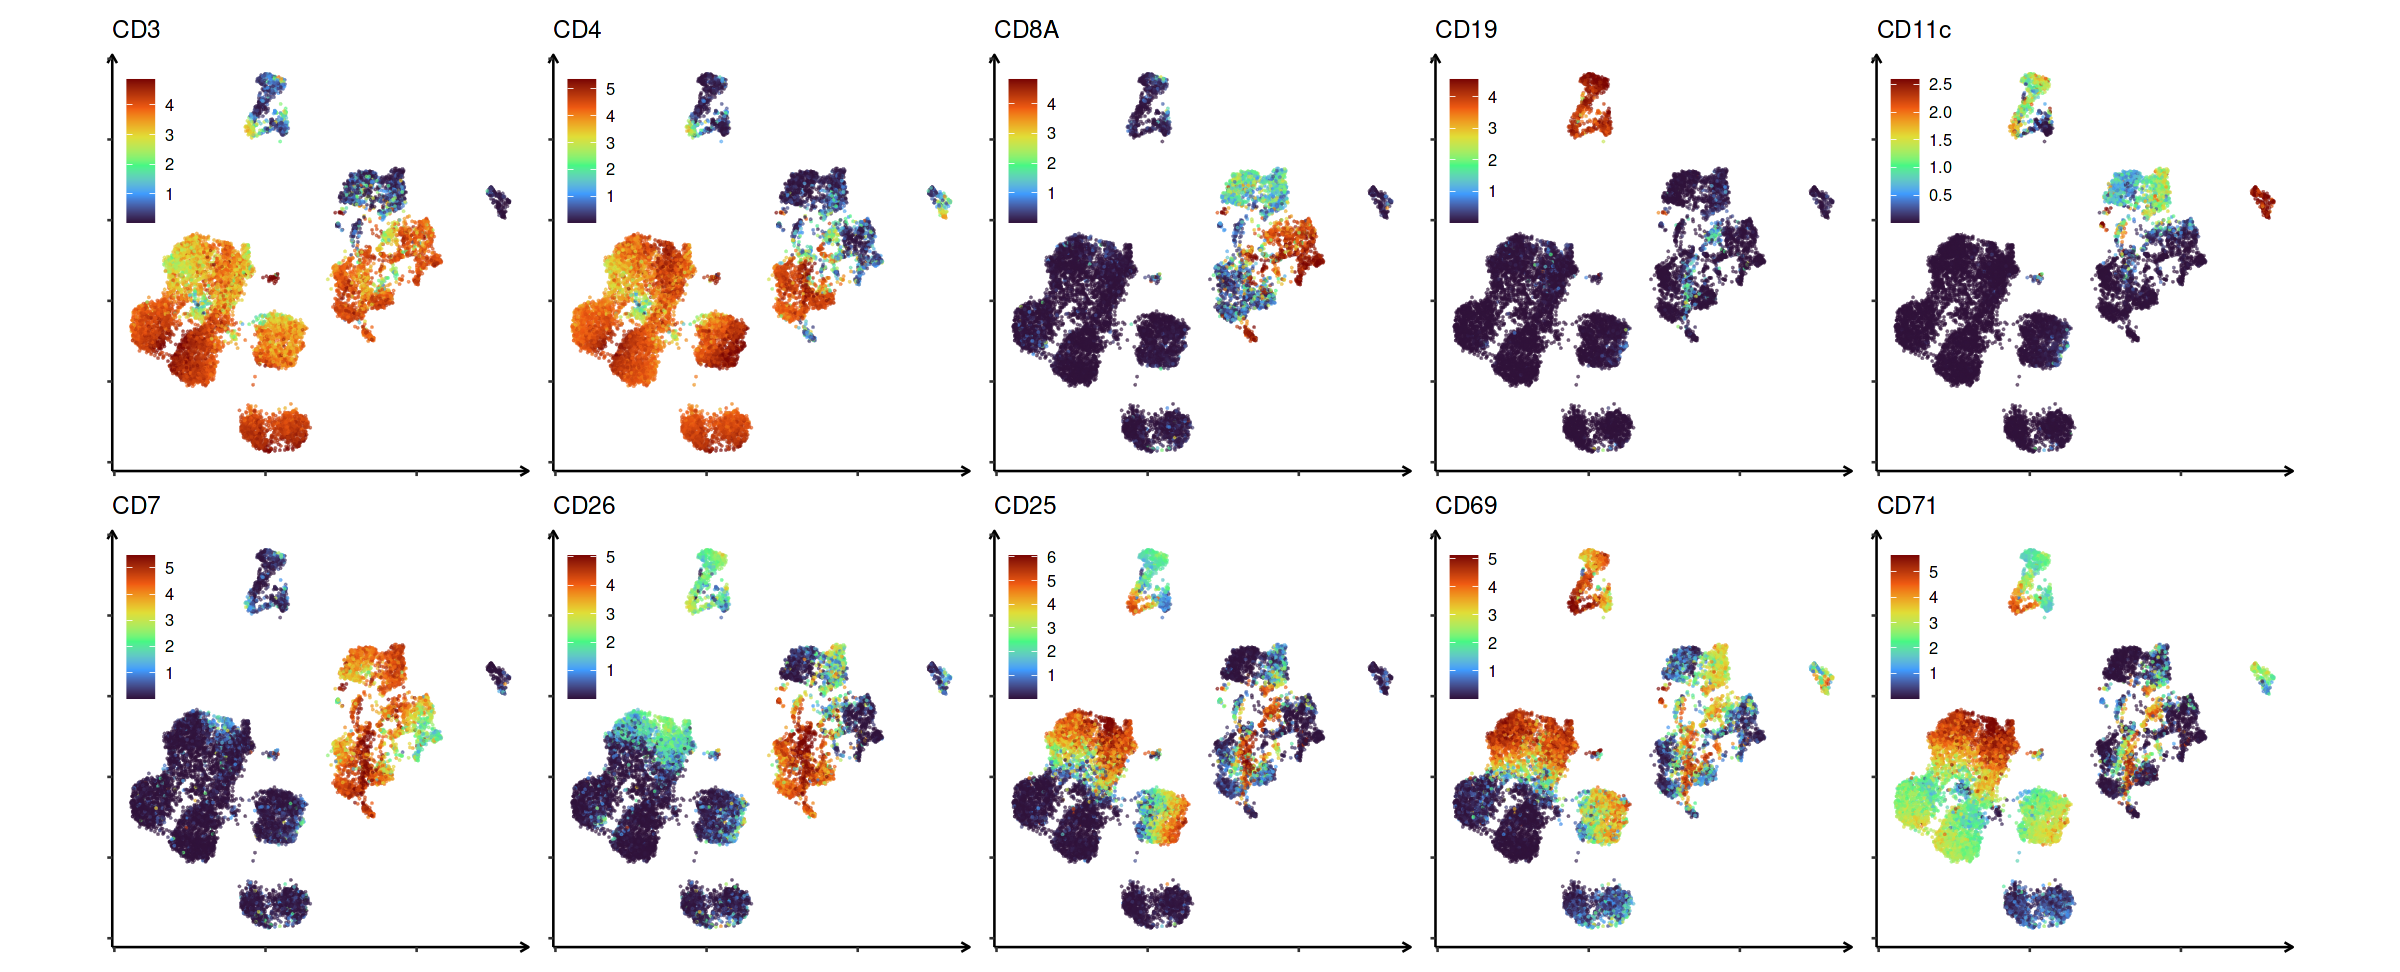

In [11]:
fig_cols <- 5
options(repr.plot.width=5, repr.plot.height=5)
plots_ADT <- map(paste0("VI_ADT_", c("CD3", "CD4", "CD8A", "CD19", "CD11c", "CD7", "CD26", "CD25", "CD69", "CD71")), function(marker){
    scutility::plot_dimred(sce, dimred="umap", rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, shuffle=TRUE, 
                           max.cutoff="q99", min.cutoff="q1",
                           scale_color=scale_color_viridis_c(option="turbo"), 
                           colour_by=marker) + 
                           ggtitle(gsub("VI_ADT_", "", marker)) + 
                           theme(legend.position=c(0.01,0.99), 
                                 legend.justification=c(0,1), 
                                 legend.title=element_blank(), 
                                 aspect.ratio=1)
})

options(repr.plot.width=fig_cols*4, repr.plot.height=ceiling(length(plots_ADT)/fig_cols)*4+0.1)
wrap_plots(plots_ADT, ncol=fig_cols)

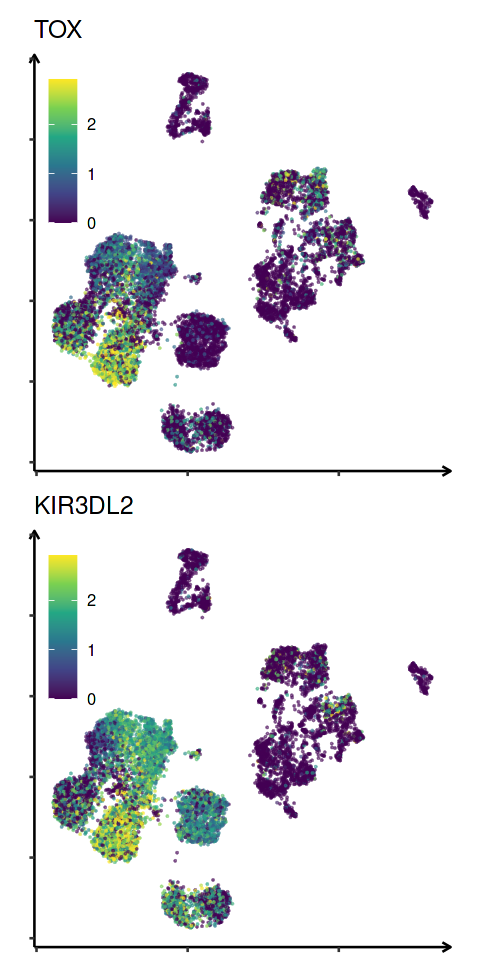

In [12]:
fig_cols <- 1
options(repr.plot.width=5, repr.plot.height=5)
plots_malignant <- map(paste0("", c("TOX", "KIR3DL2")), function(marker){ #, "DNM3", "LAIR2"
    scutility::plot_dimred(sce, dimred="umap", rasterise=TRUE,
                           point_size=0.25, point_alpha=0.5, order=FALSE, 
                           max.cutoff="q97", 
                           scale_color=scale_color_viridis_c(option="viridis"), 
                           colour_by=marker) + 
                           ggtitle(gsub("VI_ADT_", "", marker)) + 
                           theme(legend.position=c(0.01,0.99), 
                                 legend.justification=c(0,1), 
                                 legend.title=element_blank(), 
                                 aspect.ratio=1)
})

options(repr.plot.width=fig_cols*4, repr.plot.height=ceiling(length(plots_malignant)/fig_cols)*4+0.1)
wrap_plots(plots_malignant, ncol=fig_cols)

png 
  2

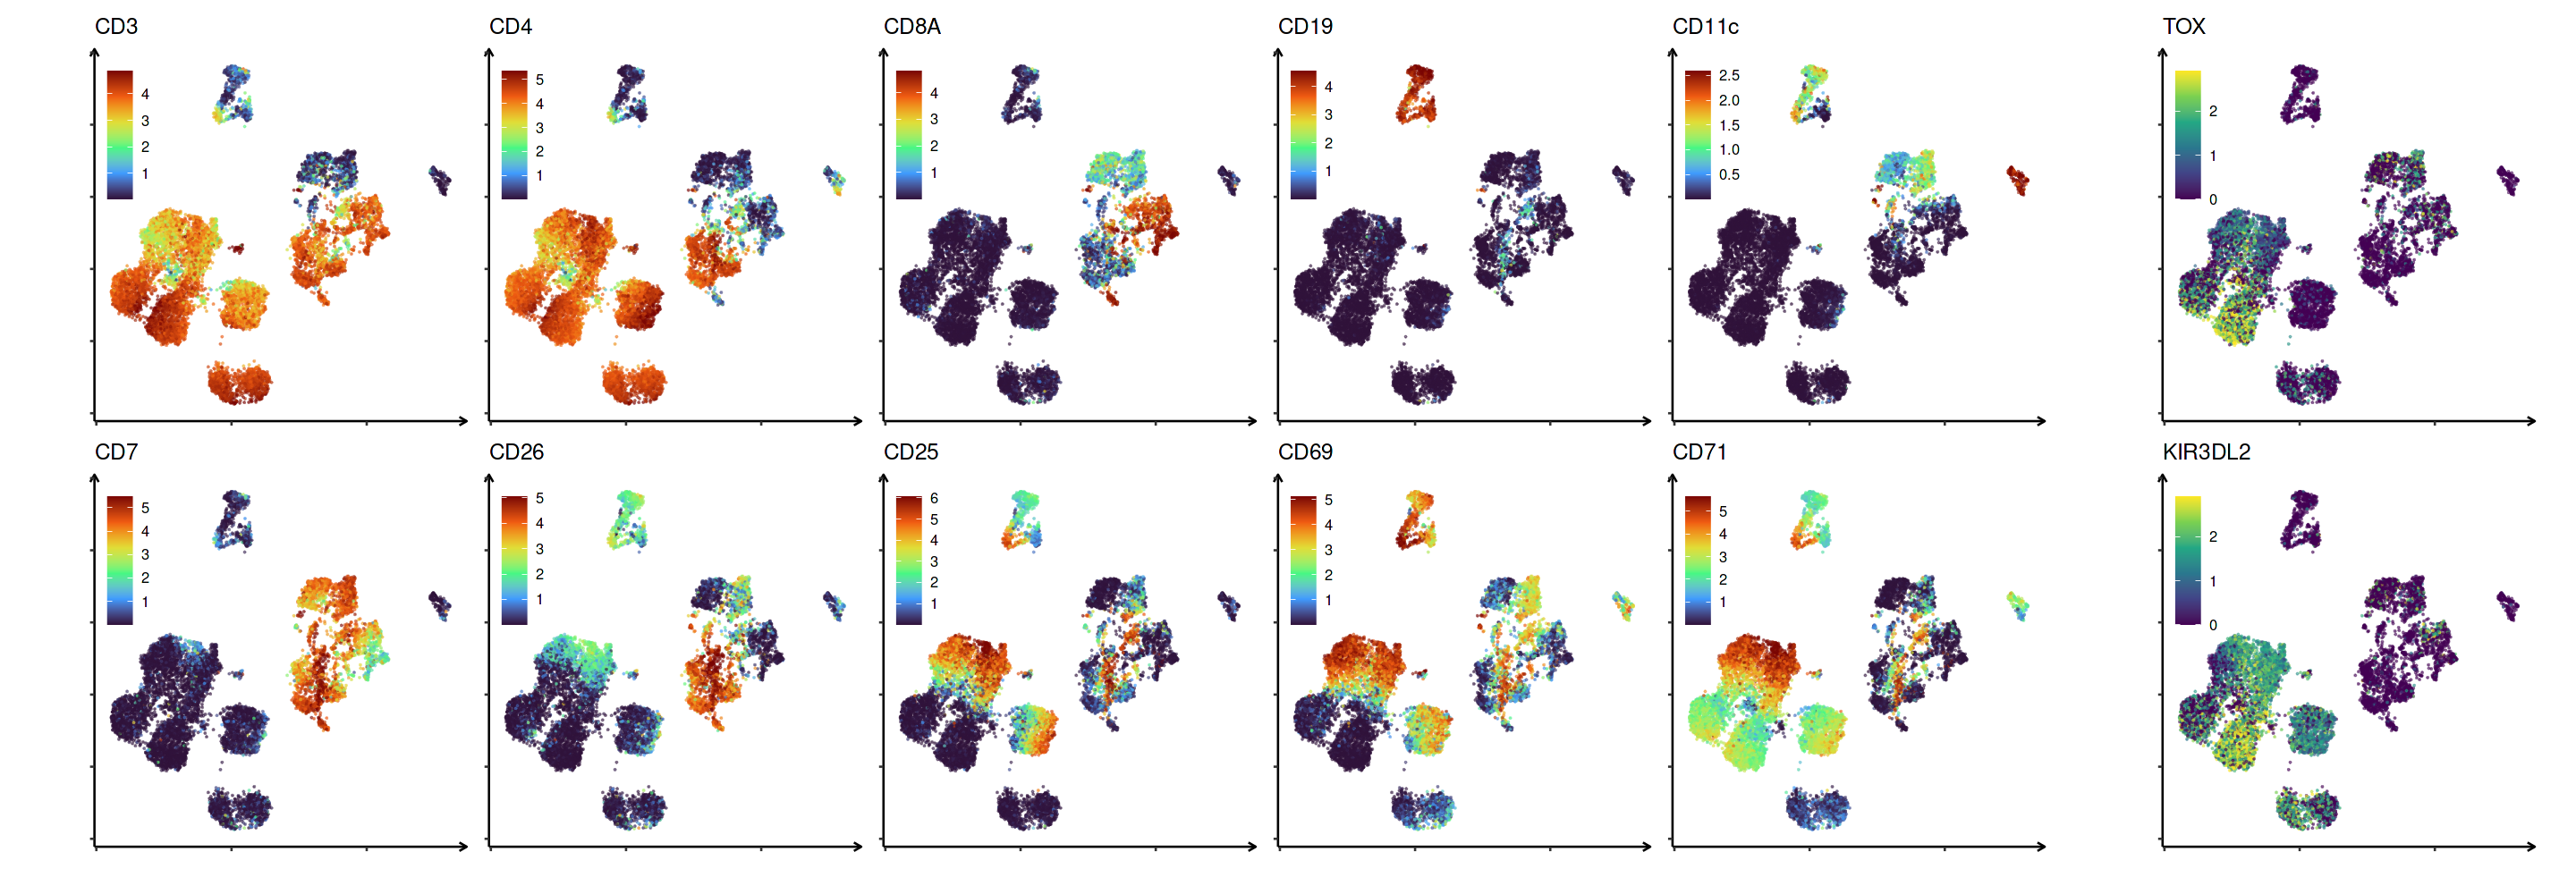

In [13]:
options(repr.plot.width=6*4, repr.plot.height=2*4+0.1)
plot_markers <- wrap_plots(wrap_plots(plots_ADT, ncol=5), wrap_plots(plots_malignant, ncol=1), nrow=1, widths=c(5,1))

pdf(file=here::here("PBMC_SE_Romidepsin_markers_UMAP.pdf"), width=24, height=8.2)
plot_markers
dev.off()

plot_markers

### Differentially expressed genes

In [14]:
# FILTER NON-EXPRESSED GENES AWAY:
threshold_expression_min <- 1
threshold_min_cells <- 10
subset <- which(sce$cell_type == "Malignant")
sce %<>% .[which(rowSums(counts(sce)[, subset] >= threshold_expression_min) >= threshold_min_cells), ]
sce

class: SingleCellExperiment 
dim: 17369 11444 
metadata(5): hvg multisce_path ann_singleR_encode PCA_malignant_CNV
  colors
assays(2): counts logcounts
rownames(17369): LINC01409 LINC01128 ... AL592183.1 AC240274.1
rowData names(0):
colnames(11444): AAACCTGAGAGATGAG-1_lane1 AAACCTGAGCTGTTCA-1_lane1 ...
  TTTGTCATCAACGAAA-1_lane2 TTTGTCATCGCCTGAG-1_lane2
colData names(129): sum detected ... clonotype1 group_short
reducedDimNames(1): umap
mainExpName: RNA
altExpNames(1): VI_ADT

In [15]:
subset <- which(sce$cell_type %in% c("Malignant"))

Treatment_DEG <- pairwiseTTests(sce[, subset], groups=sce$group[subset], block=sce$lane[subset], lfc=0.5, direction="any")
names(Treatment_DEG$statistics) <- paste(Treatment_DEG$pairs$first, Treatment_DEG$pairs$second, sep="__")

DEG <- Treatment_DEG$statistics[which(Treatment_DEG$pairs$second == "PBS_DMSO")] %>% map(function(results){
    results %>% as.data.frame() %>% tibble::rownames_to_column("gene")
})

names(DEG)

[1] "PBS_Romidepsin__PBS_DMSO" "SE_DMSO__PBS_DMSO"       
[3] "SE_Romidepsin__PBS_DMSO"

In [222]:
subset <- which(sce$cell_type == "Malignant")

features <- DEG %>% bind_rows(.id="comparison") %>% 
    filter(FDR <= 0.05) %>% 
    arrange(-abs(logFC)) %>% 
    # This gives a more balanced view as it only uses the top 100 DEG from each comparison
    #group_by(comparison) %>% slice_head(n=100) %>% 
    pull(gene) %>% unique()

length(features)
data_plot <- logcounts(sce)[features, subset] %>% as.data.frame %>% tibble::rownames_to_column("gene") %>% 
    tidyr::pivot_longer(-gene, names_to="barcode") %>% 
    left_join(colData(sce)[subset, c("cell_type", "treatment", "stimulation", "tissue", "group")] %>% as.data.frame %>% tibble::rownames_to_column("barcode")) %>%
    filter(cell_type == "Malignant") %>% 
    group_by(gene, tissue, group, treatment, stimulation) %>% summarize(value=mean(value), count=n())

[1] 574

Joining, by = "barcode"
`summarise()` has grouped output by 'gene', 'tissue', 'group', 'treatment'. You can override using the `.groups` argument.


In [268]:
ann <- data.frame(group=unique(sce$group)) %>% 
    tidyr::separate(group, into=c("stimulation", "treatment"), remove=FALSE) %>% 
    mutate(group_short=group_to_short[group]) %>% 
    tibble::column_to_rownames("group")

ann_color <- list(stimulation=c("PBS"="grey", "SE"="#CC0000"),
                  treatment=c("DMSO"="grey", "Romidepsin"="#009900"),
                  group_short=metadata(sce)$colors$group_short)

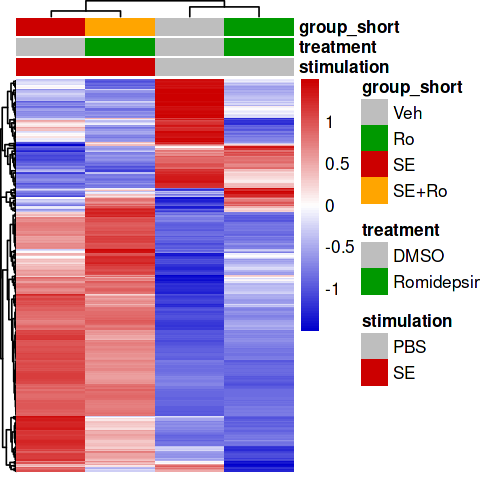

In [269]:

options(repr.plot.width=4, repr.plot.height=4)
plots$heatmap <- data_plot %>% 
    tidyr::pivot_wider(id_cols="gene", names_from=c("group"), names_sep="::", values_from="value") %>% 
    tibble::column_to_rownames("gene") %>% 
    as.matrix() %>% 
    #.[, c("PBS_DMSO", "PBS_Romidepsin", "SE_DMSO", "SE_Romidepsin")] %>% 
    pheatmap::pheatmap(scale="row", color=colorRampPalette(c("#0000CC", "white", "#CC0000"))(100),
                       show_rownames=FALSE, show_colnames=FALSE, 
                       cluster_cols=TRUE, treeheight_col=5,
                       annotation_col=ann, annotation_colors=ann_color, 
                       treeheight_row=5) %>% 
    ggplotify::as.ggplot()
    
    

png 
  2

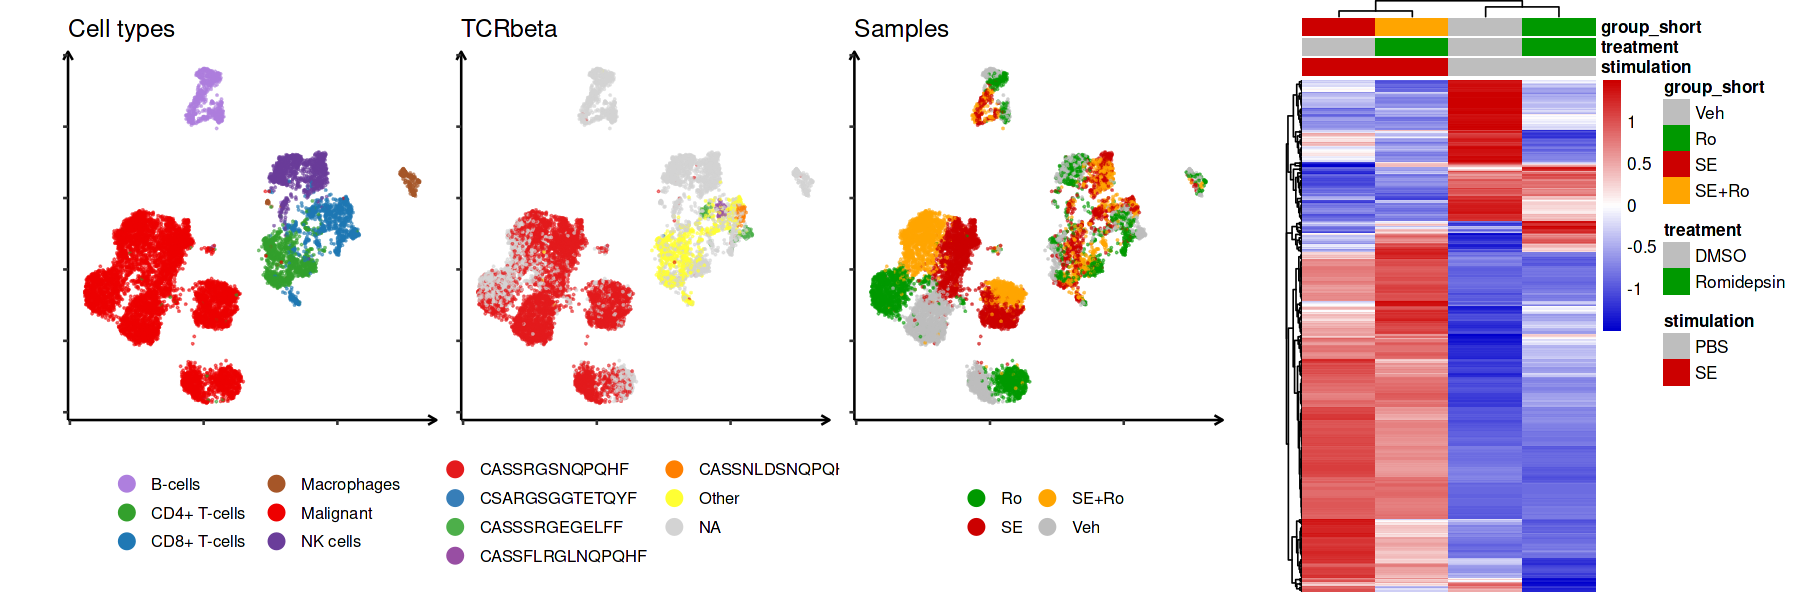

In [270]:
options(repr.plot.width=15, repr.plot.height=5)
plot <- cowplot::plot_grid(wrap_plots(map2(plots[1:3], c("Cell types", "TCRbeta", "Samples"), ~ .x + ggtitle(.y)), nrow=1), plots$heatmap, nrow=1, rel_widths=c(3,1.2))
pdf(file=here::here("PBMC_SE_Romidepsin_overview_heatmap.pdf"), width=15, height=5)
plot
dev.off()

plot

### Pathway GSEA

In [26]:
library(clusterProfiler)
library(ReactomePA)
library('org.Hs.eg.db')
universe_entrez <- mapIds(org.Hs.eg.db, DEG[[1]]$gene, 'ENTREZID', 'SYMBOL')

length(universe_entrez)
sum(is.na(universe_entrez))

'select()' returned 1:many mapping between keys and columns



[1] 17369

[1] 2967

In [46]:
GSEA_subcluster <- imap(DEG, function(DEG, comparison){
    if(nrow(DEG) > 0){
        info <- strsplit(comparison, split="__")
        print(info)
       geneList <- with(DEG, setNames(logFC, universe_entrez[gene]) %>% sort(decreasing=TRUE))
        #geneList %<>% append(with(DEG_up_by_tissue[[paste(info[[1]][c(1,3,2)], collapse="__")]] %>% arrange(logFC), setNames(-logFC, universe_entrez[gene])))

        GSEA <- gsePathway(geneList, 
                           pvalueCutoff = 0.05,
                           pAdjustMethod = "BH", 
                           verbose=FALSE)

        return(GSEA)
    } else {
        return(NULL)
    }
})

[[1]]
[1] "PBS_Romidepsin" "PBS_DMSO"      



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.16% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


[[1]]
[1] "SE_DMSO"  "PBS_DMSO"



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in fgseaMultilevel(...):
“There were 2 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


[[1]]
[1] "SE_Romidepsin" "PBS_DMSO"     



Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


In [3]:
GSEA_df <- map(GSEA_subcluster, as.data.frame) %>% bind_rows(.id="sample")

GSEA_df %<>% 
    tidyr::separate(sample, into=c("group1", "group2"), sep="__")

In [4]:
reactome_pathways <- read.table("include/ReactomePathways.txt", sep="\t", header=FALSE, fill=TRUE, quote="")
colnames(reactome_pathways) <- c("pathway", "name", "organism")
reactome_link <- read.table("include/ReactomePathwaysRelation.txt", sep="\t", header=FALSE)
colnames(reactome_link) <- c("parent", "child")

In [50]:
reactome_link_df <- reactome_link
reactome_link_df$first <- reactome_link_df$child
reactome_link_dyn <- reactome_link

i <- 0
parent_count <- 1
while(parent_count > 0){
    i <- i+1
    
    
    cur_name <- paste0("parent", i)
    reactome_link_df[[cur_name]] <- reactome_link_df$parent
    reactome_link_df$child <- reactome_link_df$parent
    reactome_link_df$parent <- NULL
    reactome_link_df %<>% left_join(reactome_link_dyn)
    
    parent_count <- length(unique(na.omit(reactome_link_df$child)))
    
    if(i > 30) parent_count <- 0
}

Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"
Joining, by = "child"


In [51]:
pathways_to_top_level <- reactome_link_df %>% 
    tidyr::pivot_longer(-c(first)) %>% 
    mutate(iteration=gsub("parent", "", name) %>% as.numeric) %>% 
    filter(!is.na(value)) %>% 
    arrange(-iteration) %>% 
    group_by(first) %>% summarize(level_num=iteration[1], level1=value[1], level2=value[2], level3=value[3], levels=paste(value, collapse=", "))

Warning message in gsub("parent", "", name) %>% as.numeric:
“NAs introduced by coercion”


In [5]:
GSEA_df %<>% left_join(pathways_to_top_level %>% dplyr::select(first, level1, level_num), by=c("ID"="first")) %>% 
    left_join(reactome_pathways %>% 
                  filter(organism=="Homo sapiens") %>% 
                  mutate(level1_name=name) %>% 
                  dplyr::select(pathway, level1_name), 
              by=c("level1"="pathway"))

`summarise()` has grouped output by 'group', 'group1'. You can override using the `.groups` argument.


png 
  2

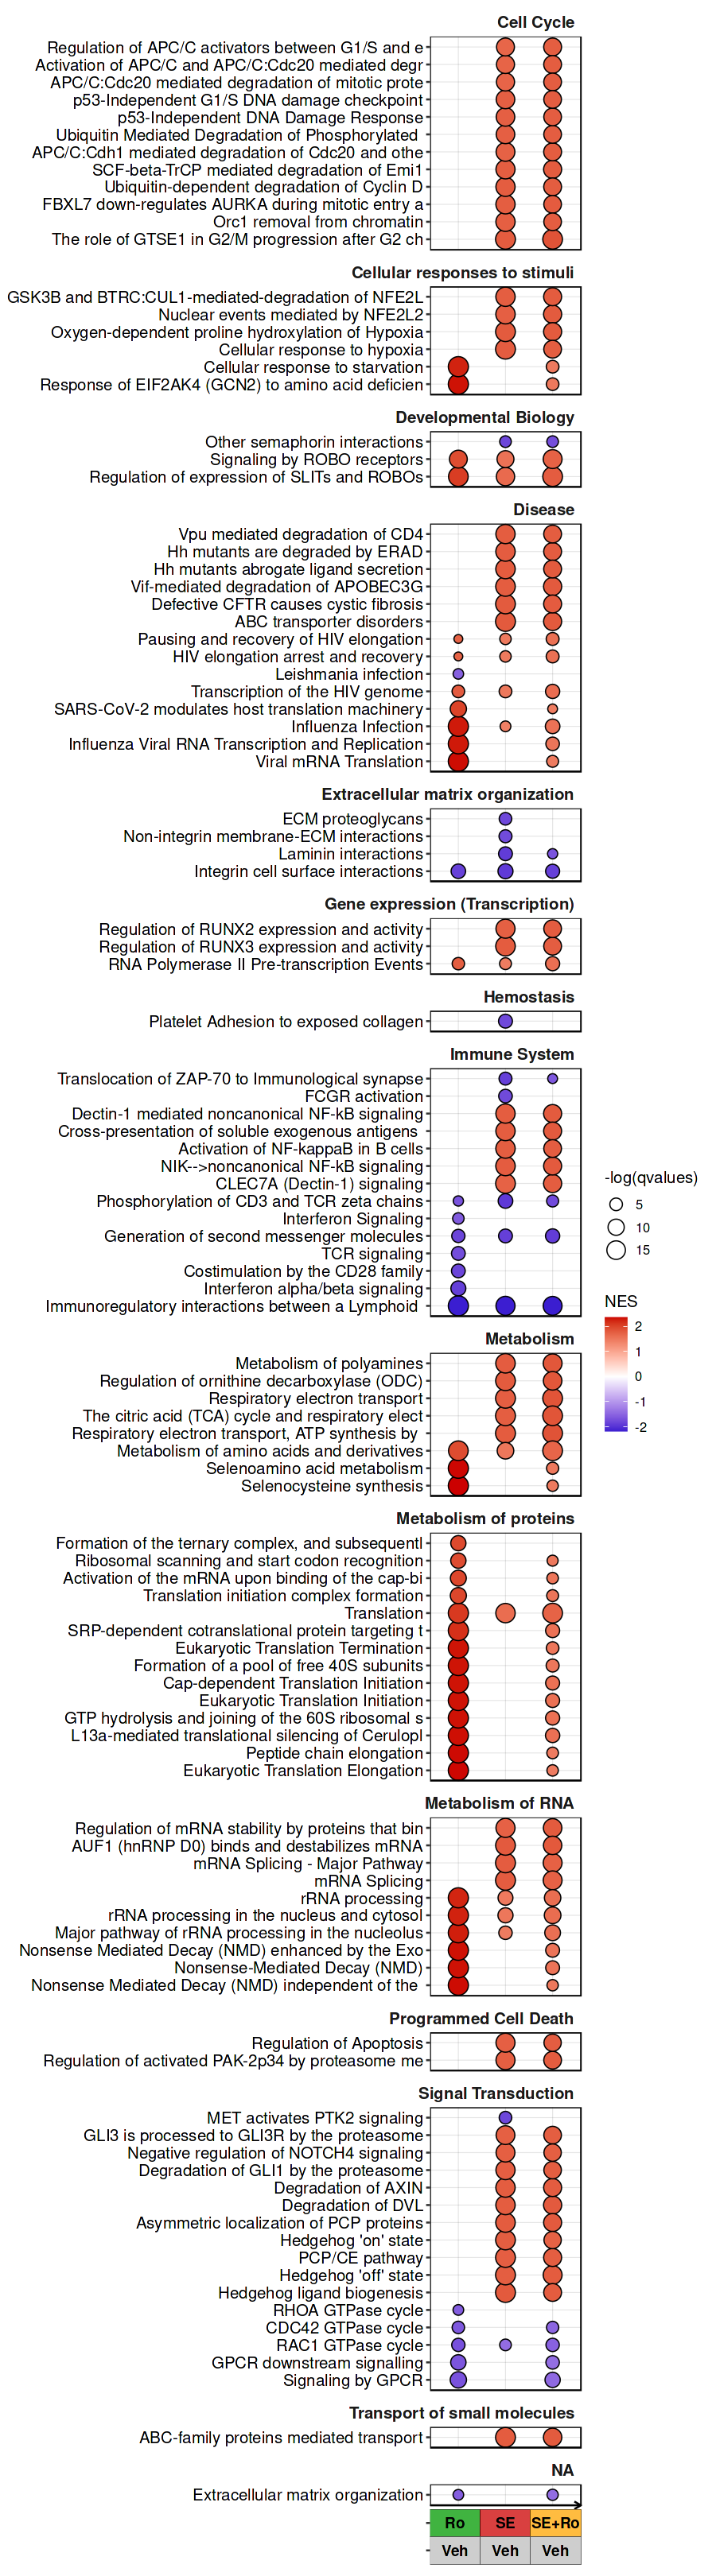

In [252]:
GSEA_all <- GSEA_df %>% 
    #filter(level1_name %in% c("Immune System", "Programmed Cell Death", "Signal Transduction", "Drug ADME")) %>% 
    #filter(level1_name %in% c("Immune System")) %>% 
    #group_by(ID) %>% mutate(min_qvalue=min(qvalues)) %>% filter(min_qvalue <= 0.05) %>% 
    mutate(Description_sub=substr(Description, 1, 49)) %>% 
    #mutate(Description_sub=stringr::str_wrap(Description, width = 35)) %>% 
    mutate(Description_sub=Description_sub %>% factor(levels=unique(.))) #%>% 

GSEA_selection <- GSEA_all %>% 
    #filter(qvalues <= 0.05) %>% pull(ID) %>% unique()
    group_by(group1, group2) %>% arrange(-abs(NES)) %>% slice_head(n=50) %>% pull(ID) %>% unique()
    

plot <- GSEA_all %>% 
    filter(ID %in% c(GSEA_selection)) %>%
    ggplot(aes(x=paste(group1, group2), y=Description_sub, size=-log(qvalues), fill=NES)) + 
        geom_point(shape=21) + 
        #facet_grid(rows=vars(level1_name), space="free", scales="free") + 
        ggforce::facet_col(facets=vars(level1_name), space="free", scales="free_y") + 
        scale_fill_gradient2(low="#0000CC", high="#CC0000", mid="white", midpoint=0) + 
        scale_size_continuous(range=c(2.5, 6.5)) + 
        theme(axis.text.y=element_text(), strip.clip = "off",
              axis.text.x=element_blank(),
              axis.line.y=element_blank(),
              axis.ticks.x=element_blank(),
              strip.text.x=element_text(angle=0, face = "bold", hjust=1),
              plot.margin=margin(0,0,0,0, "pt"), 
              panel.grid.major=element_line(color=alpha("black", 0.1), size=0.25),
              panel.border=element_rect(fill=alpha("white", 0))) + 
        labs(x="Comparison", y="Pathway")

plot_tile <- GSEA_all %>% 
    mutate(group=paste(group1, group2, sep="_")) %>%
    group_by(group, group1, group2) %>% summarize(count=n()) %>% dplyr::select(c(group, group1, group2)) %>% 
    tidyr::pivot_longer(-c(group), values_to="sample") %>% 
    ggplot(aes(x=group, y=factor(name) %>% forcats::fct_rev(), fill=group_to_short[as.character(sample)])) + 
    geom_tile(color="black", alpha=0.75) + 
    geom_text(aes(label=group_to_short[as.character(sample)]), fontface="bold") + 
    scale_fill_manual(values=metadata(sce)$colors$group_short) + 
    scale_y_discrete(expand=c(0,0,0,0),labels=c("group1"="Up", "group2"="Down")) + 
    scale_x_discrete(expand=c(0,0,0,0)) + 
    theme(axis.line=element_blank(), 
          legend.position="none",
          strip.text = element_blank(),
          #panel.spacing.y=unit(3, "mm"),
          axis.ticks.x=element_blank(), 
          plot.margin=margin(0,0,0,0, "pt"), 
          axis.text.x=element_blank(),
          #axis.text.y=element_blank()
          ) + 
    labs(fill="Treatment")

options(repr.plot.width=7.5, repr.plot.height=27)
wrap_plots(plot, plot_tile, ncol=1, heights=c(45,1), guides="collect")

pdf(file=here::here("PBMC_SE_Romidepsin_top50_Pathways.pdf"), width=7.5, height=27)
wrap_plots(plot, plot_tile, ncol=1, heights=c(45,1), guides="collect")
dev.off()

`summarise()` has grouped output by 'group', 'group1'. You can override using the `.groups` argument.


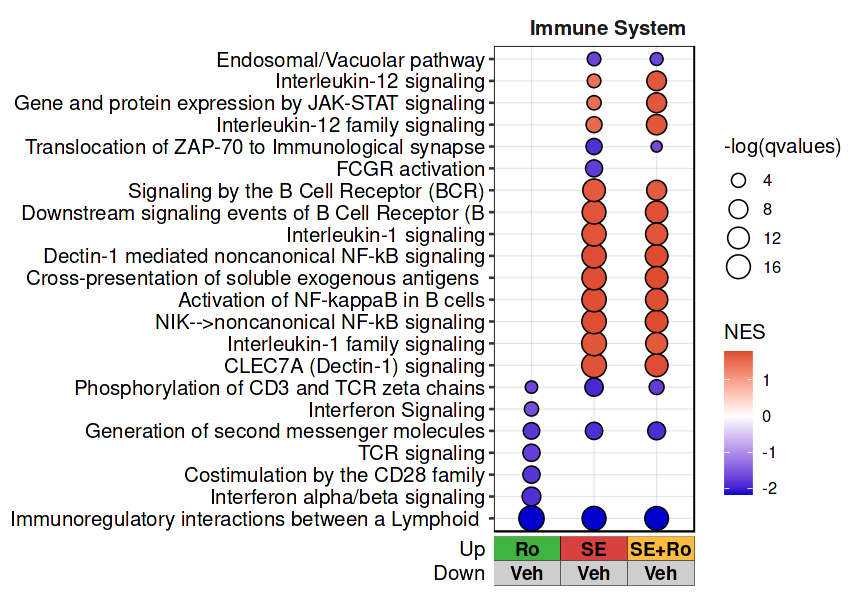

In [264]:
GSEA_all <- GSEA_df %>% 
    #filter(level1_name %in% c("Immune System", "Programmed Cell Death", "Signal Transduction", "Drug ADME")) %>% 
    filter(level1_name %in% c("Immune System")) %>% 
    #group_by(ID) %>% mutate(min_qvalue=min(qvalues)) %>% filter(min_qvalue <= 0.05) %>% 
    mutate(Description_sub=substr(Description, 1, 49)) %>% 
    #mutate(Description_sub=stringr::str_wrap(Description, width = 35)) %>% 
    mutate(Description_sub=Description_sub %>% factor(levels=unique(.))) #%>% 

GSEA_selection <- GSEA_all %>% 
    #filter(qvalues <= 0.05) %>% pull(ID) %>% unique()
    group_by(group1, group2) %>% arrange(-abs(NES)) %>% slice_head(n=15) %>% pull(ID) %>% unique()
    

plot <- GSEA_all %>% 
    filter(ID %in% GSEA_selection) %>%
    ggplot(aes(x=paste(group1, group2), y=Description_sub, size=-log(qvalues), fill=NES)) + 
        geom_point(shape=21) + 
        #facet_grid(rows=vars(level1_name), space="free", scales="free") + 
        ggforce::facet_col(facets=vars(level1_name), space="free", scales="free_y") + 
        scale_fill_gradient2(low="#0000CC", high="#CC0000", mid="white", midpoint=0) + 
        scale_size_continuous(range=c(2.5, 6.5)) + 
        theme(axis.text.y=element_text(), strip.clip = "off",
              axis.text.x=element_blank(),
              axis.line.y=element_blank(),
              axis.ticks.x=element_blank(),
              strip.text.x=element_text(angle=0, face = "bold", hjust=1),
              plot.margin=margin(0,0,0,0, "pt"), 
              axis.line=element_blank(),
              panel.grid.major=element_line(color=alpha("black", 0.1), size=0.25),
              panel.border=element_rect(fill=alpha("white", 0))) + 
        labs(x="Comparison", y="Pathway")

plot_tile <- GSEA_all %>% 
    mutate(group=paste(group1, group2, sep="_")) %>%
    group_by(group, group1, group2) %>% summarize(count=n()) %>% dplyr::select(c(group, group1, group2)) %>% 
    tidyr::pivot_longer(-c(group), values_to="sample") %>% 
    ggplot(aes(x=group, y=factor(name) %>% forcats::fct_rev(), fill=group_to_short[sample])) + 
    geom_tile(color="black", alpha=0.75) + 
    geom_text(aes(label=group_to_short[sample]), fontface="bold") + 
    scale_fill_manual(values=metadata(sce)$colors$group_short) + 
    scale_y_discrete(expand=c(0,0,0,0), labels=c("group1"="Up", "group2"="Down")) + 
    scale_x_discrete(expand=c(0,0,0,0)) + 
    theme(axis.line=element_blank(),
          strip.text = element_blank(),
          #panel.spacing.y=unit(3, "mm"),
          axis.ticks=element_blank(), 
          axis.text.y=element_text(),
          plot.margin=margin(0,0,0,0, "pt"), 
          axis.text.x=element_blank(),
          legend.position="none",
          #axis.text.y=element_blank()
          ) + 
    labs(fill="Treatment")

options(repr.plot.width=7.2, repr.plot.height=5)
plots$pathway <- wrap_plots(plot, plot_tile, ncol=1, heights=c(10,1), guides="collect")
plots$pathway

### Transcription factor activity

In [97]:
subset <- which(sce$cell_type %in% c("Malignant"))

Treatment_TF <- pairwiseTTests(altExp(sce, "TF")[, subset], assay.type="consensus",  groups=sce$group[subset], block=sce$lane[subset], lfc=0.5, direction="any")
names(Treatment_TF$statistics) <- paste(Treatment_TF$pairs$first, Treatment_TF$pairs$second, sep="__")

TF <- Treatment_TF$statistics[which(Treatment_TF$pairs$second == "PBS_DMSO")] %>% map(function(results){
    results %>% as.data.frame() %>% tibble::rownames_to_column("gene")
})

names(Treatment_TF)

[1] "statistics" "pairs"

`summarise()` has grouped output by 'group', 'group1'. You can override using the `.groups` argument.


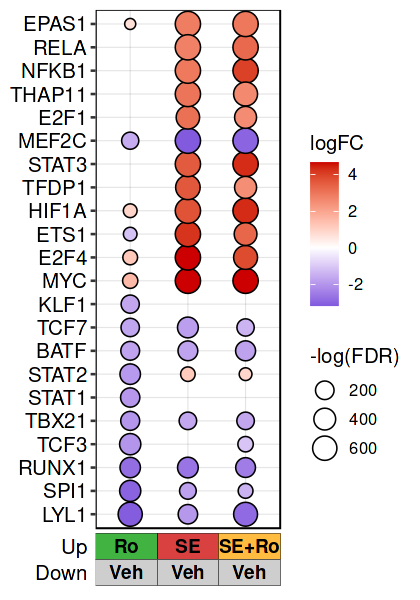

In [263]:
TF_DE <- TF %>% bind_rows(.id="comparison") %>% 
    filter(FDR <= 0.05) %>% 
    mutate(gene=gsub("TF_", "", gene)) %>% 
    arrange(-abs(logFC))


TF_selection <- TF_DE %>% 
    group_by(comparison) %>% slice_head(n=10) %>% pull(gene) %>% unique()

TF_DE %<>% 
    filter(gene %in% TF_selection) %>% 
    mutate(gene=factor(gene, levels=TF_selection)) %>% 
    tidyr::separate(comparison, into=c("group1", "group2"), sep="__")

TF_DE_q99 <- quantile(TF_DE$logFC, probs=0.95)
TF_DE$logFC[TF_DE$logFC > TF_DE_q99] <- TF_DE_q99
TF_DE_FDR_q99 <- quantile(TF_DE$FDR, probs=0.1)
pval_max <- 10^-300
TF_DE$FDR[TF_DE$FDR < pval_max] <- pval_max

    
plot <- TF_DE %>% 
    ggplot(aes(x=paste(group1, group2), y=gene, size=-log(FDR), fill=logFC)) + 
        geom_point(shape=21) + 
        scale_fill_gradient2(low="#0000CC", high="#CC0000", mid="white", midpoint=0) + 
        scale_size_continuous(range=c(2.5, 6.5)) + 
        theme(axis.text.y=element_text(), strip.clip = "off",
              axis.text.x=element_blank(),
              axis.line.y=element_blank(),
              axis.ticks.x=element_blank(),
              strip.text.x=element_text(angle=0, face = "bold", hjust=1),
              plot.margin=margin(0,0,0,0, "pt"), 
              axis.line=element_blank(),
              panel.grid.major=element_line(color=alpha("black", 0.1), size=0.25),
              panel.border=element_rect(fill=alpha("white", 0))) + 
        labs(x="Comparison", y="Pathway")

plot_tile <- TF_DE %>% 
    mutate(group=paste(group1, group2, sep="_")) %>%
    group_by(group, group1, group2) %>% summarize(count=n()) %>% dplyr::select(c(group, group1, group2)) %>% 
    tidyr::pivot_longer(-c(group), values_to="sample") %>% 
    ggplot(aes(x=group, y=factor(name) %>% forcats::fct_rev(), fill=group_to_short[sample])) + 
    geom_tile(color="black", alpha=0.75) + 
    geom_text(aes(label=group_to_short[sample]), fontface="bold") + 
    scale_fill_manual(values=metadata(sce)$colors$group_short) + 
    scale_y_discrete(expand=c(0,0,0,0), labels=c("group1"="Up", "group2"="Down")) + 
    scale_x_discrete(expand=c(0,0,0,0)) + 
    theme(axis.line=element_blank(),
          strip.text = element_blank(),
          #panel.spacing.y=unit(3, "mm"),
          axis.ticks=element_blank(), 
          axis.text.y=element_text(),
          plot.margin=margin(0,0,0,0, "pt"), 
          axis.text.x=element_blank(),
          legend.position="none",
          #axis.text.y=element_blank()
          ) + 
    labs(fill="Treatment")

options(repr.plot.width=3.5, repr.plot.height=5)
plots$TF <- wrap_plots(plot, plot_tile, ncol=1, heights=c(10,1), guides="collect")
plots$TF

png 
  2

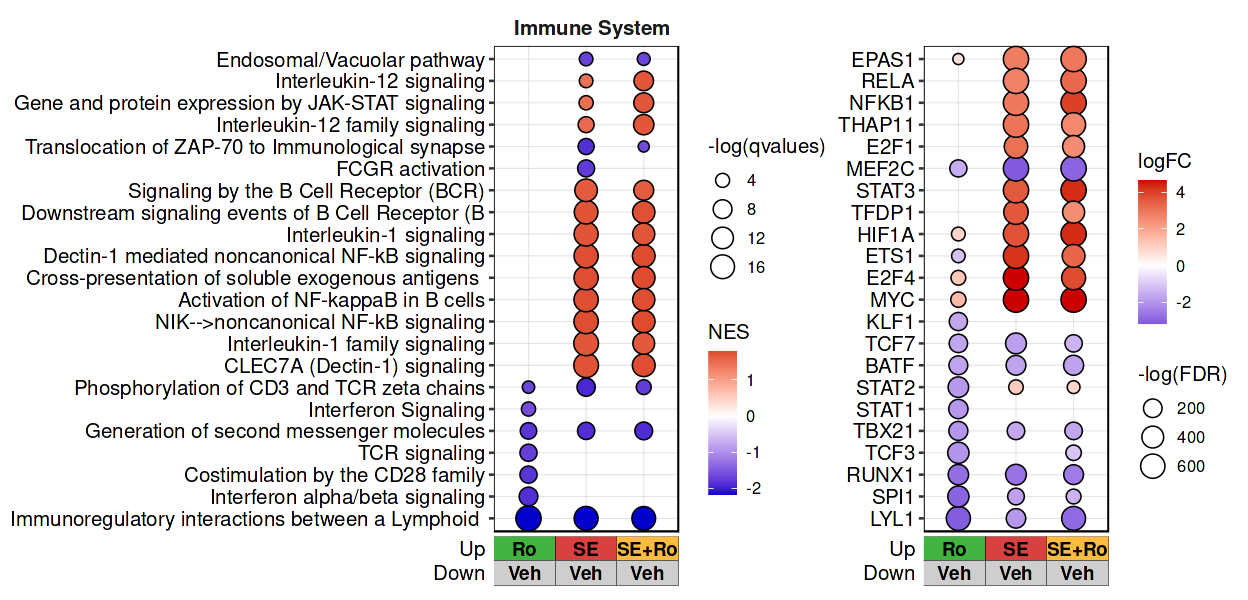

In [266]:
options(repr.plot.width=10.4, repr.plot.height=5)
plot <- wrap_plots(plots$pathway, plots$TF, widths=c(5,5))

pdf(file=here::here("PBMC_SE_Romidepsin_top15_Pathways_top10_TF.pdf"), width=10.4, height=5)
plot
dev.off()

plot